In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib
import json
import os
from datetime import datetime
from sklearn.decomposition import PCA

In [17]:

data1 = pd.read_csv('data/S07-hw-dataset-01.csv')
data2 = pd.read_csv('data/S07-hw-dataset-02.csv')
data3 = pd.read_csv('data/S07-hw-dataset-03.csv')


# Описание датасетов

In [32]:
print(f"Датасет-1: {data1.shape}, Датасет-2: {data2.shape}, Датасет-3: {data3.shape}")

Датасет-1: (12000, 9), Датасет-2: (8000, 4), Датасет-3: (15000, 5)


In [20]:
# EDA для Dataset 1
data1.info()  

data1.describe() 
print(data1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64


In [21]:
data1.head()


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [22]:
# EDA для Dataset 2
data2.info()  

data2.describe() 
print(data2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64


In [23]:
data2.head()


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [24]:
# EDA для Dataset 3
data3.info()  

data3.describe() 
print(data3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64


In [25]:
data3.head()


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


# Подготовка данных

In [29]:
def preprocess(df):
    scaler = StandardScaler()
    dscaled = scaler.fit_transform(df.drop(columns=['sample_id']))
    dscaled = pd.DataFrame(dscaled, columns=df.columns[1:])
    print(dscaled.describe())

    return dscaled

In [31]:
ds1_scaled = preprocess(data1)
ds2_scaled = preprocess(data2)
ds3_scaled = preprocess(data3)

                f01           f02           f03           f04           f05  \
count  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04   
mean   3.789561e-17 -3.611926e-17 -6.513308e-18 -1.450691e-17 -2.338870e-17   
std    1.000042e+00  1.000042e+00  1.000042e+00  1.000042e+00  1.000042e+00   
min   -1.587805e+00 -1.842482e+00 -2.734501e+00 -2.126283e+00 -1.662143e+00   
25%   -6.399128e-01 -9.770177e-01  1.935994e-01 -6.759285e-01 -7.033384e-01   
50%   -4.035542e-01  5.751405e-01  3.801565e-01  4.133173e-01  9.044044e-02   
75%    2.677134e-01  8.418290e-01  5.534115e-01  6.133506e-01  5.882440e-01   
max    2.435850e+00  1.531914e+00  1.466893e+00  1.406729e+00  1.979437e+00   

                f06           f07           f08  
count  1.200000e+04  1.200000e+04  1.200000e+04  
mean   1.302662e-17 -1.776357e-17 -4.736952e-18  
std    1.000042e+00  1.000042e+00  1.000042e+00  
min   -1.452210e+00 -3.613287e+00 -4.350886e+00  
25%   -6.604444e-01 -6.707207e-01 -6.7

## KMeans

In [44]:
def kmeans_auto(data, name):
    silhouettes = []
    k_values = range(2, 10)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        sil = silhouette_score(data, labels)
        silhouettes.append(sil)

    best_k = k_values[np.argmax(silhouettes)]

    plt.plot(k_values, silhouettes, marker="o")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette method")
    plt.savefig(f"artifacts/figures/{name}")
    plt.show()

    # финальная модель с лучшим k
    best_kmeans = KMeans(n_clusters=best_k, random_state=42)
    best_labels = best_kmeans.fit_predict(data)

    return best_k, best_labels, silhouettes

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

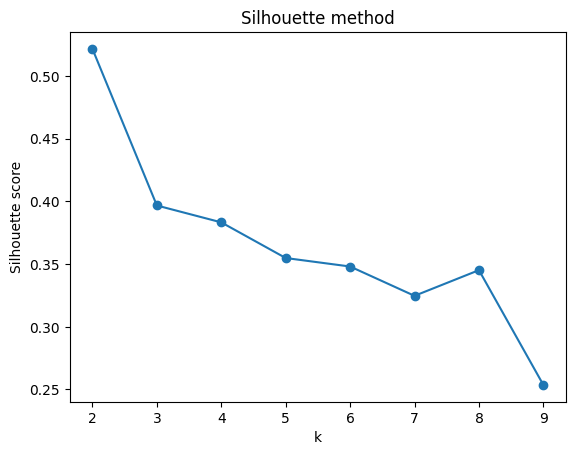

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Лучшее k: 2 [0.5216395622404242, 0.3967578520894987, 0.38330054183984447, 0.3548681599475395, 0.348089842445193, 0.324703878783531, 0.34518954265751806, 0.2536496949857121]


In [60]:
best_k, labels1, silhouettes = kmeans_buto(ds1_scaled, "sil_dataset_b.png")
print("Лучшее k:", best_k,silhouettes)


D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

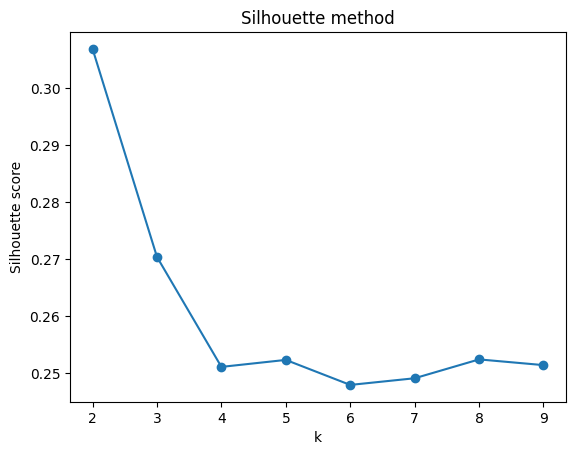

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Лучшее k: 2 [0.3068577265637877, 0.27036131473329433, 0.2510782835157656, 0.2523030636889645, 0.24791554412615058, 0.24908502599557453, 0.2523914666835484, 0.2513897710238286]


In [61]:
best_k, labels2, silhouettes = kmeans_auto(ds2_scaled, "sil_dataset_B.png")
print("Лучшее k:", best_k,silhouettes)

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

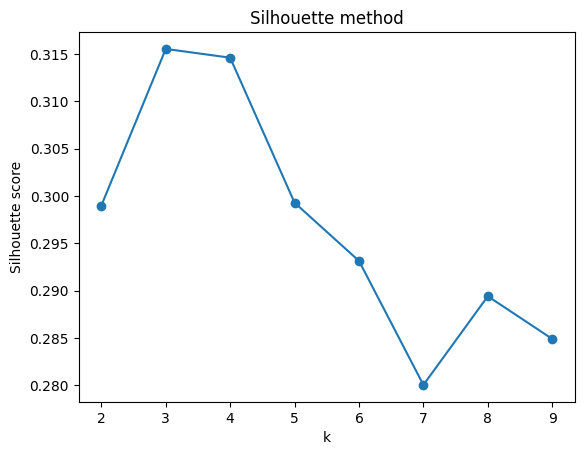

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Лучшее k: 3 [0.29898602191880497, 0.3155447003782518, 0.31461865789976146, 0.2992949512462458, 0.2931448140530978, 0.28004261088348587, 0.28941182887401107, 0.28490188356401774]


In [62]:
best_k, labels3, silhouettes = kmeans_auto(ds3_scaled, "sil_dataset_C.png")
print("Лучшее k:", best_k,silhouettes)

## DBSCAN

In [57]:
def dbscan(data):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels_db = dbscan.fit_predict(data)
    sil_db = silhouette_score(data, labels_db)
    return labels_db, sil_db


In [58]:
labels_db1,sil_db1=dbscan(ds1_scaled)
labels_db2,sil_db2=dbscan(ds2_scaled)
labels_db3,sil_db3=dbscan(ds3_scaled)

In [59]:
print("Для датасета A", sil_db1)
print("Для датасета B", sil_db2)
print("Для датасета C", sil_db3)

Для датасета A 0.25673643555803094
Для датасета B -0.0851996311903564
Для датасета C -0.11289920203319767


## Метрики


In [66]:
def metrics(data,lab,labbd):
    sil_k = silhouette_score(data, lab)
    db_k = davies_bouldin_score(data, lab)
    ch_k = calinski_harabasz_score(data, lab)
    
    dbscan = DBSCAN(eps=0.5, min_samples=5)  
    labels_db = dbscan.fit_predict(data)  
    sil_db = silhouette_score(data, labbd)
    db_db = davies_bouldin_score(data, labbd)
    ch_db = calinski_harabasz_score(data, labbd)
    
    return sil_k, db_k ,ch_k, sil_db, db_db, ch_db 
sil_k_a,db_k_a, ch_k_a,sil_db_a,db_db_a,ch_db_a= metrics(ds1_scaled,labels1, labels_db1)
sil_k_b,db_k_b, ch_k_b,sil_db_b,db_db_b,ch_db_b= metrics(ds2_scaled,labels2, labels_db2)
sil_k_c,db_k_c, ch_k_c,sil_db_c,db_db_c,ch_db_c= metrics(ds3_scaled,labels3, labels_db3)

In [67]:
print(f'KMeans A: Sil {sil_k_a}, DB {db_k_a}, CH {ch_k_a}')
print(f'DBSCAN A: Sil {sil_db_a}, DB {db_db_a}, CH {ch_db_a}')
print(f'KMeans B: Sil {sil_k_b}, DB {db_k_b}, CH {ch_k_b}')
print(f'DBSCAN B: Sil {sil_db_b}, DB {db_db_b}, CH {ch_db_b}')
print(f'KMeans C: Sil {sil_k_c}, DB {db_k_c}, CH {ch_k_c}')
print(f'DBSCAN C: Sil {sil_db_c}, DB {db_db_c}, CH {ch_db_c}')

KMeans A: Sil 0.5216395622404242, DB 0.6853295219054456, CH 11786.954622671532
DBSCAN A: Sil 0.25673643555803094, DB 1.5870277602584766, CH 3210.2734068998398
KMeans B: Sil 0.3068577265637877, DB 1.32347174904028, CH 3573.397676572467
DBSCAN B: Sil -0.0851996311903564, DB 1.985649030453946, CH 43.51028289589608
KMeans C: Sil 0.3155447003782518, DB 1.1577256320598663, CH 6957.162639510167
DBSCAN C: Sil -0.11289920203319767, DB 17.51056038317382, CH 9.497899364029788


## PCA

In [68]:
def pc(data,lab,labbd,name,name2):
    pca = PCA(n_components=2)  
    pca_data = pca.fit_transform(data)  
    plt.scatter(pca_data[:,0], pca_data[:,1], c=lab)  
    plt.title('PCA KMeans Dataset A')  
    plt.savefig(f"artifacts/figures/{name}")
    plt.show() 

    # PCA для Dataset A (DBSCAN)
    pca = PCA(n_components=2)  
    pca_data = pca.fit_transform(data)  
    plt.scatter(pca_data[:,0], pca_data[:,1], c=labbd)  
    plt.title('PCA DBSCAN Dataset A') 
    plt.savefig(f"artifacts/figures/{name2}")
    plt.show()


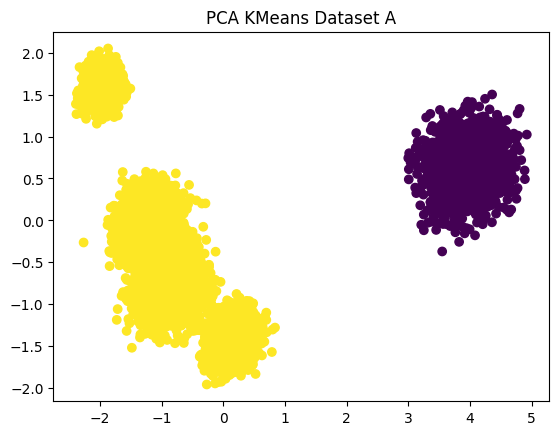

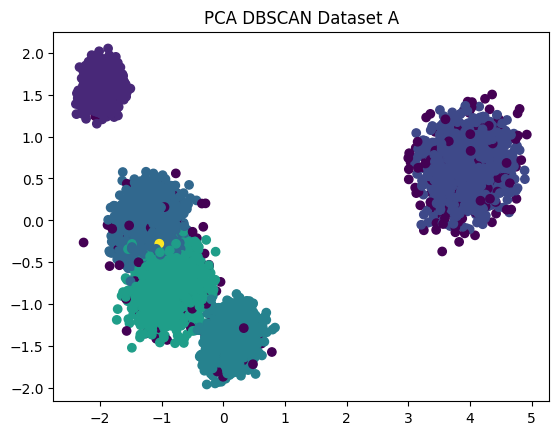

In [69]:
pc(ds1_scaled,labels1, labels_db1,"pca_a_kmeans.png","pca_a_dbscan.png")

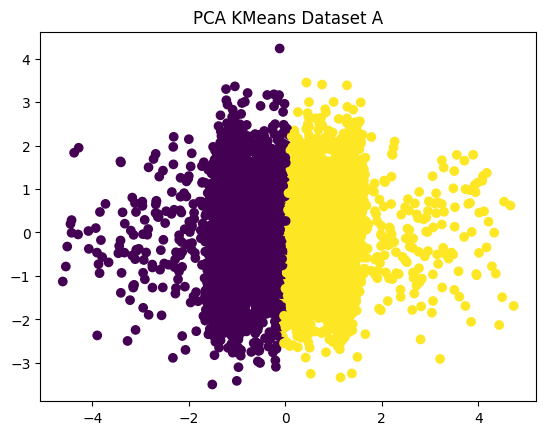

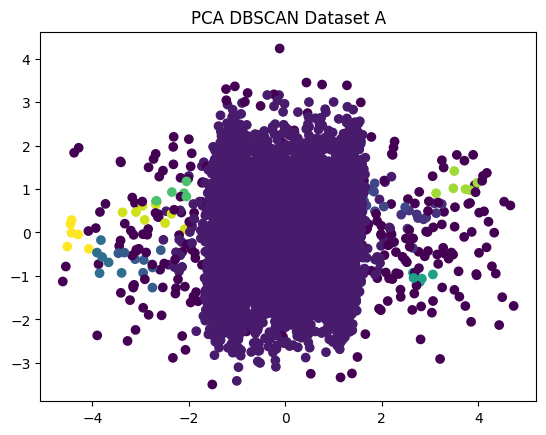

In [70]:
pc(ds2_scaled,labels2, labels_db2,"pca_b_kmeans.png","pca_b_dbscan.png")

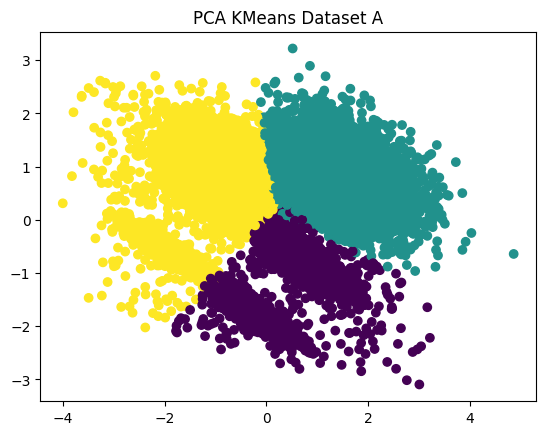

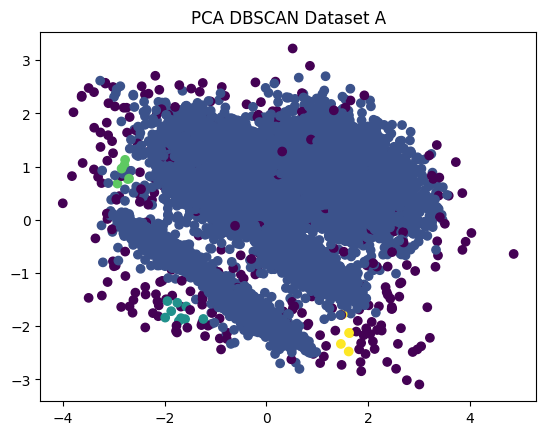

In [71]:
pc(ds3_scaled,labels3, labels_db3,"pca_c_kmeans.png","pca_c_dbscan.png")

## Устойчивость

In [72]:
scores = []  
for seed in [42,1,2,3,4]:  
    kmeans = KMeans(n_clusters=2, random_state=seed)  
    kmeans.fit(ds1_scaled)  
    sil = silhouette_score(ds1_scaled, kmeans.labels_)  
    scores.append(sil)  
print(scores)  

D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\mirea\qa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

[0.5216395622404242, 0.5216395622404242, 0.5216395622404242, 0.5216395622404242, 0.5216395622404242]


In [74]:
data1['cluster'] = labels1  
data1.groupby('cluster').mean()  

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
cluster,,,,,,,,,
0,6088.081667,17.540764,60.096197,-1.196370,-102.674372,10.074911,29.255953,-0.568951,-0.008659
1,5977.354583,-7.416086,8.860706,0.021514,15.312967,-2.757124,-6.110273,0.184392,0.011712


In [75]:
data2['cluster'] = labels2
data2.groupby('cluster').mean()  

,sample_id,x1,x2,z_noise
cluster,,,,
0,3986.019169,1.132172,-0.203973,0.233980
1,4013.095908,-0.180015,0.689997,-0.014127


In [76]:
data3['cluster'] = labels3
data3.groupby('cluster').mean()  

,sample_id,x1,x2,f_corr,f_noise
cluster,,,,,
0,9858.307363,2.610427,-3.584087,1.338032,-0.006847
1,10821.528533,6.596926,5.883479,1.169742,-0.073104
2,3792.113760,-2.864448,1.780900,-1.195789,-0.016116


In [ ]:
best = best_model["data2"]["best_model"]

params = best["params"].copy()

params["n_clusters"] = params.pop("k")
model = KMeans(**params, random_state=42)

labels2 = model.fit_predict(Xs["data2"])

In [ ]:
best = best_model["data3"]["best_model"]

params = best["params"].copy()

params["n_clusters"] = params.pop("k")
model = KMeans(**params, random_state=42)

labels3 = model.fit_predict(Xs["data3"])

In [ ]:
best = best_model["data4"]["best_model"]

params = best["params"].copy()

params["n_clusters"] = params.pop("k")
model = KMeans(**params, random_state=42)

labels4 = model.fit_predict(Xs["data4"])